In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

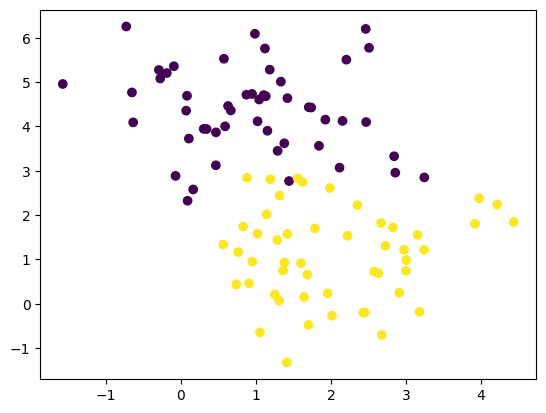

In [3]:
X, y = make_blobs(100, 2, centers=2, random_state=0)
y = y.reshape(len(y), 1)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [4]:
def init (X):
    return np.random.randn(len(X[1]), 1), np.random.randn()

W, b = init(X)
print(W, b)

[[0.931043  ]
 [0.28506146]] -0.394895610015548


In [5]:
def model(X, W, b):
    Z= X.dot(W) + b
    return 1 / (1 + np.exp(-Z))

A = model(X, W, b)

In [6]:
def log_loss(A, y):
    return - 1 / len(y) * np.sum(y * np.log(A) + (1-y) * np.log(1 - A))

l_l = log_loss(A, y)
print(l_l)

1.0772744545860662


In [7]:
def gradients(X, y, A):
    D = A - y
    dw = 1 / len(y) * np.dot(X.T, D)
    db = 1 / len(y) * np.sum(D)
    return dw, db

dw, db = gradients(X, y, A)
print(dw, db)

[[0.31765452]
 [1.69763409]] 0.31848731786879786


[[ 0.86143232]
 [-1.30067091]] 1.8884656796972628


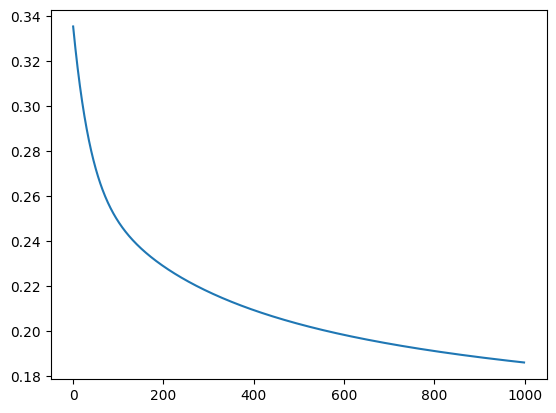

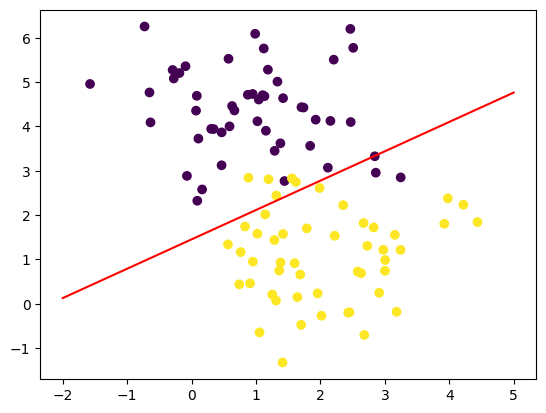

In [9]:
def perceptron(X, y, learn_rate = 0.01, n_iter = 1000):
    W, b = init(X)
    errors = []
    for _ in range(n_iter):
        A = model(X, W, b)
        l_l = log_loss(A, y)
        errors.append(l_l)
        dw, db = gradients(X, y, A)
        W -= learn_rate * dw
        b -= learn_rate * db

    return W, b, errors

W, b, errors = perceptron(X, y)
print(W, b)

plt.plot(np.arange(len(errors)), errors)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
x_plot = np.linspace(-2, 5, 1000)
plt.plot(x_plot, (-b - W[0] * x_plot) / W[1], c='red')
